In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
%matplotlib inline

In [54]:
import seaborn as sns

In [2]:
# Read data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [10]:
print(df_train.shape)
print(df_test.shape)

(67463, 35)
(28913, 35)


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [12]:
df_train.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [144]:
df_train['Batch Enrolled'].nunique()

41

In [ ]:
df_train['Batch Enrolled'].value_counts()

In [142]:
# useless - Payment Plan, Accounts Delinquent
# encoding required - Initial List Status, Application Type, Term, Batch Enrolled, Grade, Sub Grade, Employment Duration, Verification Status
# total accounts lol
# df_train[['Delinquency - two years']]
''' 
nominal catagories - Application Type (2), Batch Enrolled (41), Employment Duration (3), 
ordinal catagories - Initial List Status (2), Term (3), Grade (7), Sub Grade (35), Verification Status (3)

'''

In [156]:
df_train['Term'].value_counts()

59    43780
58    22226
36     1457
Name: Term, dtype: int64

In [24]:
df_test.isnull().values.sum()

28913

In [29]:
df_test[list(df_test.columns)[:-1]].isnull().values.any()

False

In [32]:
df_train.tail(10)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
67453,14669554,31161,16000,8386.746929,59,BAT4808022,6.524646,A,C2,MORTGAGE,...,1.109081,0.942539,0,INDIVIDUAL,9,0,39,92043,9705,0
67454,3793301,9712,25896,8740.589841,58,BAT2136391,14.729811,B,A3,MORTGAGE,...,0.255695,1.083093,0,INDIVIDUAL,36,0,18,311173,46724,0
67455,60961518,5127,16956,13917.485220,59,BAT2522922,19.388683,C,F3,MORTGAGE,...,1.805152,1.085486,0,INDIVIDUAL,36,0,39,4398,116219,0
67456,39022390,11703,19736,9972.202696,59,BAT5547201,11.430757,E,D4,MORTGAGE,...,1.233240,0.778051,0,INDIVIDUAL,29,0,31,74453,9771,0
67457,7273094,11440,17672,22965.762900,59,BAT2558388,15.025260,C,B1,RENT,...,0.061096,0.325564,0,INDIVIDUAL,151,0,38,859647,21468,0
67458,16164945,13601,6848,13175.285830,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.463010,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.457750,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.684650,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0
67462,65443173,15353,29875,14207.448600,59,BAT1930365,16.034631,B,D1,MORTGAGE,...,1.856480,0.366386,0,INDIVIDUAL,54,0,47,196960,66060,0


In [79]:
# df_train['Recoveries'].value_counts()
df_train['Total Revolving Credit Limit'].nunique()

37708

In [ ]:
df_train['Grade'].value_counts().sort_index()

In [ ]:
df_train['Sub Grade'].value_counts().sort_index()

In [51]:
corr_mat = df_train.corr()

<AxesSubplot:>

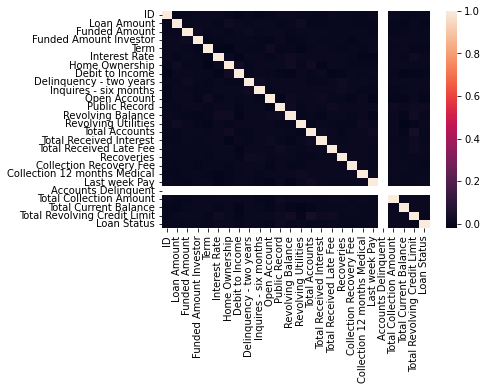

In [55]:
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns)

## DATA PREPROCESSING

In [182]:
df_edit = df_train.drop(['ID','Payment Plan', 'Accounts Delinquent'], axis='columns')
# df_edit

Getting dummies for
nominal catagories - Application Type (2), Batch Enrolled (41), Employment Duration (3), 
ordinal catagories - Initial List Status (2), Term (3), Grade (7), Sub Grade (35), Verification Status (3)

Total new columns - 96 - multivariate trap columns

In [183]:
dummies = pd.get_dummies(df_edit[['Application Type','Employment Duration','Initial List Status','Term','Sub Grade','Verification Status','Batch Enrolled','Loan Title']])
dummies.columns

Index(['Term', 'Application Type_INDIVIDUAL', 'Application Type_JOINT',
       'Employment Duration_MORTGAGE', 'Employment Duration_OWN',
       'Employment Duration_RENT', 'Initial List Status_f',
       'Initial List Status_w', 'Sub Grade_A1', 'Sub Grade_A2',
       ...
       'Loan Title_debt loan', 'Loan Title_get out of debt',
       'Loan Title_home improvement', 'Loan Title_loan1',
       'Loan Title_pay off bills', 'Loan Title_payoff', 'Loan Title_personal',
       'Loan Title_refi', 'Loan Title_relief', 'Loan Title_vacation'],
      dtype='object', length=196)

In [184]:
to_drop = ['Application Type_JOINT','Employment Duration_RENT','Initial List Status_w','Sub Grade_G5','Verification Status_Verified','Batch Enrolled_BAT5924421','Loan Title_vacation']

In [185]:
dummies.drop(to_drop, axis='columns', inplace=True)
dummies.columns

Index(['Term', 'Application Type_INDIVIDUAL', 'Employment Duration_MORTGAGE',
       'Employment Duration_OWN', 'Initial List Status_f', 'Sub Grade_A1',
       'Sub Grade_A2', 'Sub Grade_A3', 'Sub Grade_A4', 'Sub Grade_A5',
       ...
       'Loan Title_debt consolidation loan', 'Loan Title_debt loan',
       'Loan Title_get out of debt', 'Loan Title_home improvement',
       'Loan Title_loan1', 'Loan Title_pay off bills', 'Loan Title_payoff',
       'Loan Title_personal', 'Loan Title_refi', 'Loan Title_relief'],
      dtype='object', length=189)

In [186]:
df_edit.drop(['Application Type','Employment Duration','Loan Title','Grade','Initial List Status','Term','Sub Grade','Verification Status','Batch Enrolled'],axis='columns',inplace=True)
df_edit

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,...,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,11.135007,176346.62670,16.284758,1,0,13,0,...,2929.646315,0.102055,2.498291,0.793724,0,49,31,311301,6619,0
1,3609,11940,12191.99692,12.237563,39833.92100,15.412409,0,0,12,0,...,772.769385,0.036181,2.377215,0.974821,0,109,53,182610,20885,0
2,28276,9311,21603.22455,12.545884,91506.69105,28.137619,0,0,14,0,...,863.324396,18.778660,4.316277,1.020075,0,66,34,89801,26155,0
3,11170,6954,17877.15585,16.731201,108286.57590,18.043730,1,0,7,0,...,288.173196,0.044131,0.107020,0.749971,0,39,40,9189,60214,0
4,16890,13226,13539.92667,15.008300,44234.82545,17.209886,1,3,13,1,...,129.239553,19.306646,1294.818751,0.368953,0,18,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,9.408858,83961.15003,28.105127,1,0,13,0,...,1978.945960,0.023478,564.614852,0.865230,0,69,48,181775,34301,1
67459,8323,11046,15637.46301,9.972104,65491.12817,17.694279,0,0,12,0,...,3100.803125,0.027095,2.015494,1.403368,0,14,37,22692,8714,0
67460,15897,32921,12329.45775,19.650943,34813.96985,10.295774,0,0,7,1,...,2691.995532,0.028212,5.673092,1.607093,0,137,17,176857,42330,0
67461,16567,4975,21353.68465,13.169095,96938.83564,7.614624,0,0,14,0,...,3659.334202,0.074508,1.157454,0.207608,0,73,61,361339,39075,0


In [190]:
df_merged = pd.concat([df_edit,dummies], axis='columns')
df_merged

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,...,Loan Title_debt consolidation loan,Loan Title_debt loan,Loan Title_get out of debt,Loan Title_home improvement,Loan Title_loan1,Loan Title_pay off bills,Loan Title_payoff,Loan Title_personal,Loan Title_refi,Loan Title_relief
0,10000,32236,12329.36286,11.135007,176346.62670,16.284758,1,0,13,0,...,0,0,0,0,0,0,0,0,0,0
1,3609,11940,12191.99692,12.237563,39833.92100,15.412409,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0
2,28276,9311,21603.22455,12.545884,91506.69105,28.137619,0,0,14,0,...,0,0,0,0,0,0,0,0,0,0
3,11170,6954,17877.15585,16.731201,108286.57590,18.043730,1,0,7,0,...,0,0,0,0,0,0,0,0,0,0
4,16890,13226,13539.92667,15.008300,44234.82545,17.209886,1,3,13,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,9.408858,83961.15003,28.105127,1,0,13,0,...,0,0,0,0,0,0,0,0,0,0
67459,8323,11046,15637.46301,9.972104,65491.12817,17.694279,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0
67460,15897,32921,12329.45775,19.650943,34813.96985,10.295774,0,0,7,1,...,0,0,0,0,0,0,0,0,0,0
67461,16567,4975,21353.68465,13.169095,96938.83564,7.614624,0,0,14,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
df_merged.dtypes.value_counts()

uint8      188
int64       15
float64      9
dtype: int64

### EDA TODO:
1. Scale data
2. PCA and reduction

In [197]:
df_merged.to_csv('processed.csv', index=False)